In [43]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import warnings
from sklearn import tree
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('R_cleaned_data.csv')

In [45]:
def target_encode(age,gender):
    if age<=40 and gender=='Male':
        return 'Young men'
    elif age>40 and gender=='Male':
        return 'Old men'
    elif age<=40 and gender=='Female':
        return 'Young women'
    else:
        return 'Old women'

In [46]:
def get_cleaned_DrugData(DrugName):
    df_clean = df[['Age','Gender',DrugName,'Description1','Description2']].dropna()
    df_clean = pd.get_dummies(df_clean, columns=['Description1','Description2'])
    
    df_clean['Age_normalized'] = df_clean['Age'].apply(lambda x: sum(map(int,(x.split('-'))))/2)
    df_clean['Target'] = df_clean.apply(lambda x: target_encode(x.Age_normalized,x.Gender),axis=1)
    df_clean.drop(['Age','Gender'],inplace=True,axis=1)
    
    X = df_clean.drop('Target',axis=1)
    y = df_clean['Target']
    
    X_scaler = StandardScaler()
    X = X_scaler.fit_transform(X)

    print('Before Data Balancing, Category count--')
    print('-'*30)
    print(y.value_counts())
    # data balancing
    smt = SMOTE(random_state=2)
    X_smote, y_smote = smt.fit_resample(X, y)
    print('\nAfter Data Balancing, Category count--')
    print('-'*30)
    print(y_smote.value_counts())
    X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [47]:
labels = ['Young women', 'Young men', 'Old women', 'Old men']

def model_performance(y_test,y_pred):
    confusion_mat = confusion_matrix(y_test, y_pred,labels=labels)
    df_cm = pd.DataFrame(confusion_mat, index = labels,
                      columns = labels)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
    
    print('-'*45,'Classification Report','-'*45)
    print(classification_report(y_test,y_pred))
    print('-'*50,'Accuracy','-'*50)
    print(round(accuracy_score(y_test,y_pred),3))

In [48]:
def buildModel(X_train, X_test, y_train, y_test):
    print(f"\n######################### \033[1mDecisionTreeClassifier\033[0m ##############")
    rf_classifier = tree.DecisionTreeClassifier(random_state = 42)
    rf_classifier.fit(X_train, y_train)
    rf_y_pred = rf_classifier.predict(X_test)
    model_performance(y_test, rf_y_pred)


# column name

In [49]:
list(df)

['Age',
 'Gender',
 'AMITRIPTYLINE',
 'BUPROPION',
 'CITALOPRAM',
 'DESVENLAFAXINE',
 'DOXEPIN',
 'DULOXETINE',
 'ESCITALOPRAM',
 'FLUOXETINE',
 'MIRTAZAPINE',
 'NORTRIPTYLINE',
 'PAROXETINE',
 'ROPINIROLE',
 'SERTRALINE',
 'TRAZODONE',
 'VENLAFAXINE',
 'OTHER',
 'Description1',
 'Description2',
 'Description3',
 'Description4',
 'Description5',
 'Description6',
 'Description7']

# Analysis for individual drug
- Just change the Drug name here, remaining everything will be same.

Before Data Balancing, Category count--
------------------------------
Old women      368
Young women    108
Old men         65
Young men       18
Name: Target, dtype: int64

After Data Balancing, Category count--
------------------------------
Young women    368
Young men      368
Old women      368
Old men        368
Name: Target, dtype: int64

######################### DecisionTreeClassifier ##############


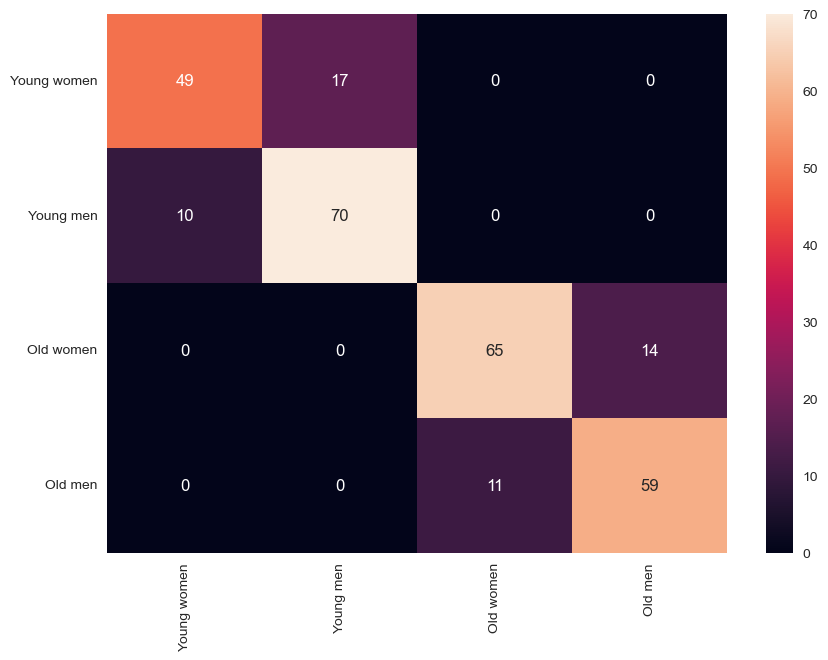

--------------------------------------------- Classification Report ---------------------------------------------
              precision    recall  f1-score   support

     Old men       0.81      0.84      0.83        70
   Old women       0.86      0.82      0.84        79
   Young men       0.80      0.88      0.84        80
 Young women       0.83      0.74      0.78        66

    accuracy                           0.82       295
   macro avg       0.82      0.82      0.82       295
weighted avg       0.82      0.82      0.82       295

-------------------------------------------------- Accuracy --------------------------------------------------
0.824


In [50]:
X_train, X_test, y_train, y_test = get_cleaned_DrugData('AMITRIPTYLINE')
buildModel(X_train, X_test, y_train, y_test)

Before Data Balancing, Category count--
------------------------------
Old women      963
Young women    591
Old men        397
Young men      207
Name: Target, dtype: int64

After Data Balancing, Category count--
------------------------------
Young women    963
Young men      963
Old women      963
Old men        963
Name: Target, dtype: int64

######################### DecisionTreeClassifier ##############


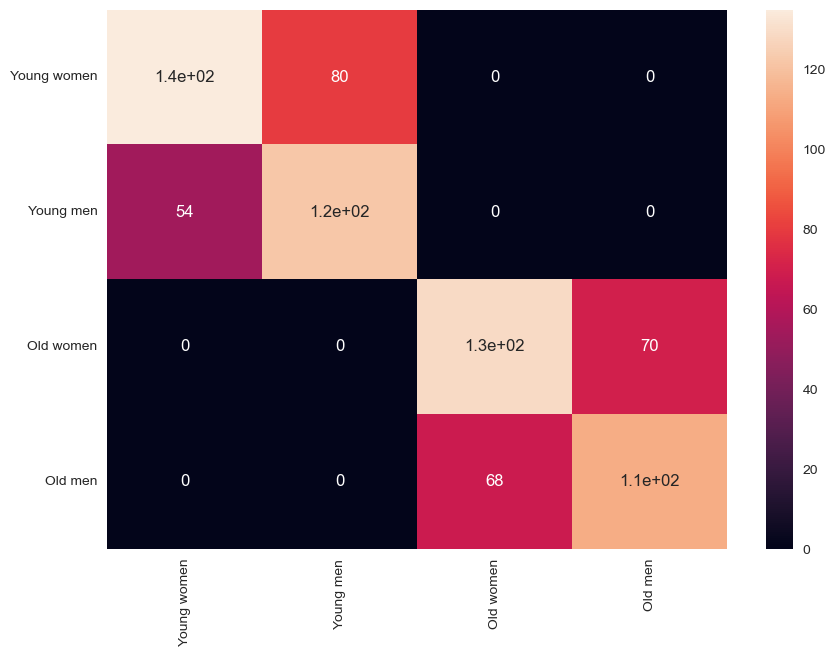

--------------------------------------------- Classification Report ---------------------------------------------
              precision    recall  f1-score   support

     Old men       0.62      0.62      0.62       181
   Old women       0.65      0.65      0.65       199
   Young men       0.60      0.69      0.65       176
 Young women       0.71      0.63      0.67       215

    accuracy                           0.65       771
   macro avg       0.65      0.65      0.65       771
weighted avg       0.65      0.65      0.65       771

-------------------------------------------------- Accuracy --------------------------------------------------
0.647


In [55]:
X_train, X_test, y_train, y_test = get_cleaned_DrugData('BUPROPION')
buildModel(X_train, X_test, y_train, y_test)

Before Data Balancing, Category count--
------------------------------
Old women      896
Young women    423
Old men        291
Young men      123
Name: Target, dtype: int64

After Data Balancing, Category count--
------------------------------
Young women    896
Young men      896
Old women      896
Old men        896
Name: Target, dtype: int64

######################### DecisionTreeClassifier ##############


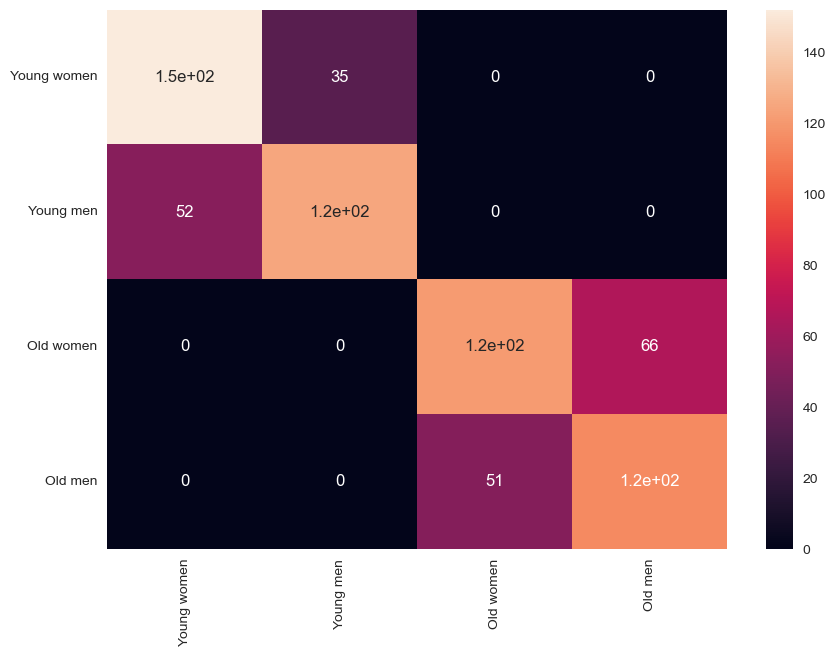

--------------------------------------------- Classification Report ---------------------------------------------
              precision    recall  f1-score   support

     Old men       0.64      0.69      0.66       166
   Old women       0.70      0.65      0.67       187
   Young men       0.78      0.71      0.74       177
 Young women       0.75      0.81      0.78       187

    accuracy                           0.72       717
   macro avg       0.72      0.71      0.71       717
weighted avg       0.72      0.72      0.72       717

-------------------------------------------------- Accuracy --------------------------------------------------
0.715


In [56]:
X_train, X_test, y_train, y_test = get_cleaned_DrugData('CITALOPRAM')
buildModel(X_train, X_test, y_train, y_test)